In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
sns.set_style("whitegrid")  
sns.set_palette("Set2")

In [3]:
path=r"C:\Users\mudav\Data science\Unified mentor internship\COVID-19 clinical trials EDA using Pandas\COVID clinical trials.csv"
data=pd.read_csv(path)
data.head(3)

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482


In [4]:
print("Shape:", data.shape)

Shape: (5783, 27)


In [5]:
data.info()
data.describe(include="all").T
missing = data.isnull().sum().sort_values(ascending=False)
print("Missing", missing)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

In [6]:
print(data.columns.tolist())

['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']


In [7]:
data.columns = data.columns.str.strip()
cols_to_drop = ["Acronym", "Study Documents", "Results First Posted"]
data = data.drop(columns=[col for col in cols_to_drop if col in data.columns])
data["Phases"] = data["Phases"].fillna("Unknown")
data["Enrollment"] = data["Enrollment"].fillna(data["Enrollment"].median())
data["Study Designs"] = data["Study Designs"].fillna("Unknown")

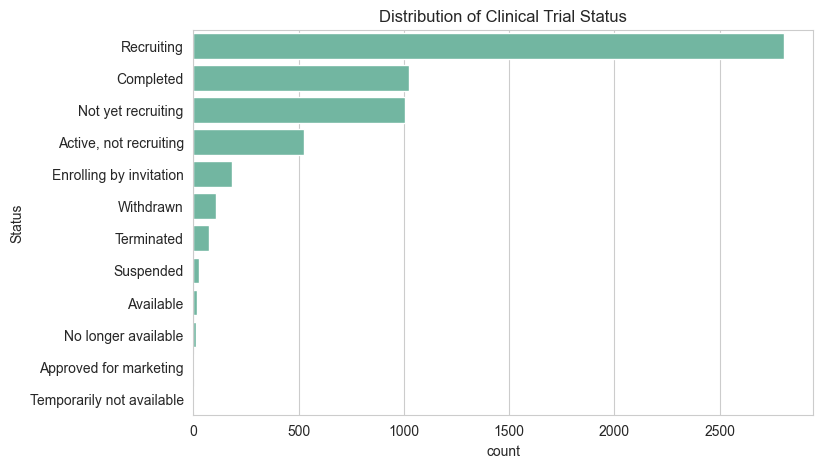

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(y=data["Status"], order=data["Status"].value_counts().index)
plt.title("Distribution of Clinical Trial Status")
plt.show()

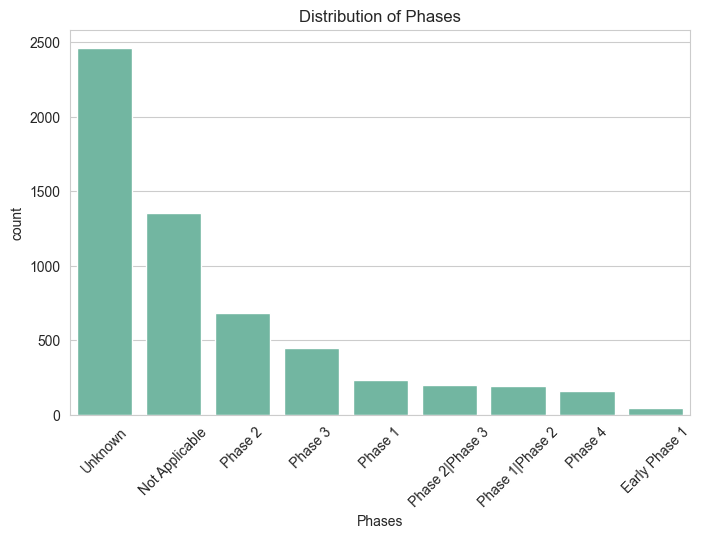

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x=data["Phases"], order=data["Phases"].value_counts().index)
plt.title("Distribution of Phases")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

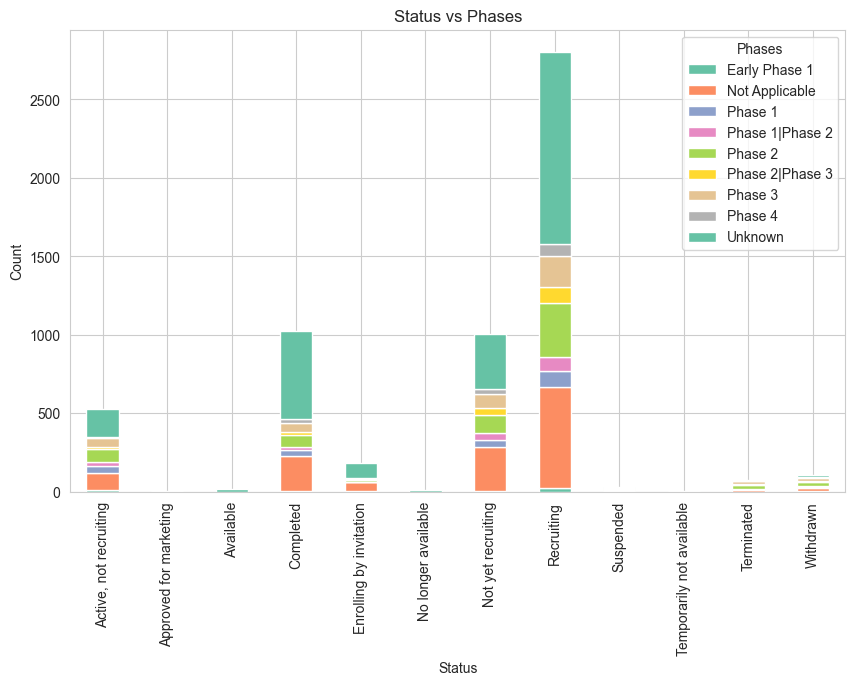

In [10]:
plt.figure(figsize=(10,6))
pd.crosstab(data["Status"], data["Phases"]).plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Status vs Phases")
plt.ylabel("Count")
plt.show()

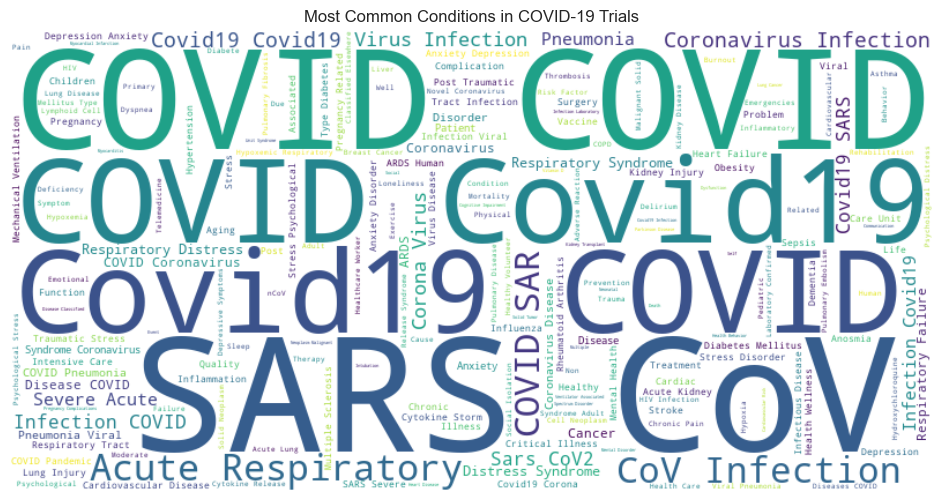

In [11]:
text = " ".join(data["Conditions"].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Conditions in COVID-19 Trials")
plt.show()

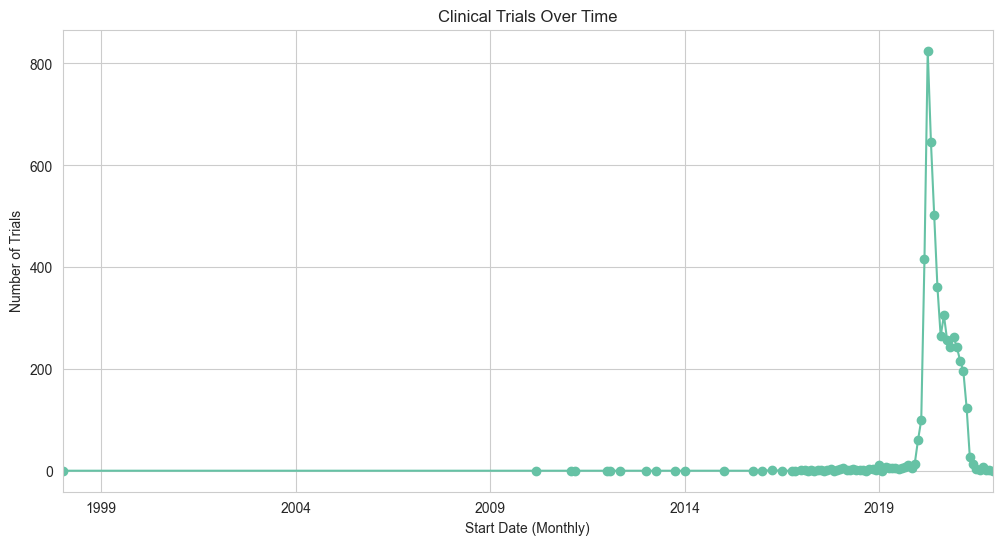

In [12]:
data["Start Date"] = pd.to_datetime(data["Start Date"], errors="coerce")
trials_over_time = data["Start Date"].dt.to_period("M").value_counts().sort_index()
plt.figure(figsize=(12,6))
trials_over_time.plot(kind="line", marker="o")
plt.title("Clinical Trials Over Time")
plt.xlabel("Start Date (Monthly)")
plt.ylabel("Number of Trials")
plt.show()

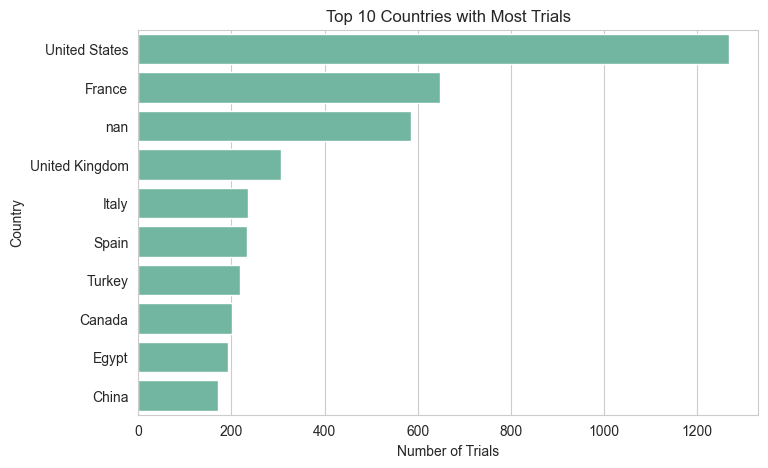

In [13]:
data["Country"] = data["Locations"].astype(str).str.split(",").str[-1].str.strip()

top_countries = data["Country"].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_countries.index, x=top_countries.values)
plt.title("Top 10 Countries with Most Trials")
plt.xlabel("Number of Trials")
plt.ylabel("Country")
plt.show()

In [14]:
data.to_csv("cleaned_covid_trials.csv", index=False)
print("Cleaned data saved as cleaned_covid_trials.csv")

Cleaned data saved as cleaned_covid_trials.csv


In [15]:
import os
XML_DIR = r"C:\Users\mudav\Data science\Unified mentor internship\COVID-19 clinical trials EDA using Pandas"
print(os.path.abspath(XML_DIR))
print(os.listdir(XML_DIR))    

C:\Users\mudav\Data science\Unified mentor internship\COVID-19 clinical trials EDA using Pandas
['.ipynb_checkpoints', 'cleaned_covid_trials.csv', 'config.py', 'COVID clinical trials.csv', 'COVID-19 Clinical Trials EDA Pandas  (  ML _ FA _ DA projects ).pdf', 'Covid_19 Project.ipynb', '__pycache__']


In [16]:
from pathlib import Path
DATA_PATH = "covid_trials.csv"
TEXT_COLS = [
"brief_title", "official_title", "brief_summary", "detailed_description",
"condition", "intervention"
]

ID_COL = "nct_id"
DATE_COLS = {"start": "start_date", "complete": "completion_date"}
TARGET_COL = "status"
COUNTRY_COL = "country"
PHASE_COL = "phase"
STUDY_TYPE_COL = "study_type"
ENROLL_COL = "enrollment"
SPONSOR_COL = "sponsor"
BINARY_TARGET_MAP = {
"Completed": 1,
"Terminated": 0,
"Withdrawn": 0,
"Suspended": 0,
}
DEFAULT_EMBEDDER = "sentence-transformers/all-MiniLM-L6-v2"
MLFLOW_TRACKING_URI = "experiments/mlruns"
SEED = 42

In [17]:
from config import DATA_PATH, DATE_COLS
def load_data(path=DATA_PATH) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data
def parse_dates(df: pd.DataFrame) -> pd.DataFrame:
    for k, col in DATE_COLS.items():
        if col in data.columns:
            data[col] = pd.to_datetime(df[col], errors="coerce")
    return data
def add_duration_days(data: pd.DataFrame) -> pd.DataFrame:
    start = DATE_COLS.get("start")
    end = DATE_COLS.get("complete")
    if start in data.columns and end in data.columns:
        data["duration_days"] = (data[end] - data[start]).dt.days
    return data

In [18]:
import os
print(os.getcwd())

C:\Users\mudav\Data science\Unified mentor internship\COVID-19 clinical trials EDA using Pandas


In [19]:
from pathlib import Path
DATA_PATH = "covid_trials.csv"
TEXT_COLS = [
    "brief_title",
    "official_title",
    "brief_summary",
    "detailed_description",
    "condition",
    "intervention",
]
ID_COL = "nct_id"
DATE_COLS = {"start": "start_date", "complete": "completion_date"}
TARGET_COL = "status"
COUNTRY_COL = "country"
PHASE_COL = "phase"
STUDY_TYPE_COL = "study_type"
ENROLL_COL = "enrollment"
SPONSOR_COL = "sponsor"
BINARY_TARGET_MAP = {
    "Completed": 1,
    "Terminated": 0,
    "Withdrawn": 0,
    "Suspended": 0,
}
DEFAULT_EMBEDDER = "sentence-transformers/all-MiniLM-L6-v2"
MLFLOW_TRACKING_URI = "experiments/mlruns"
SEED = 42

In [20]:
config_code = """from pathlib import Path

DATA_PATH = "covid_trials.csv"

TEXT_COLS = [
    "brief_title",
    "official_title",
    "brief_summary",
    "detailed_description",
    "condition",
    "intervention",
]

ID_COL = "nct_id"
DATE_COLS = {"start": "start_date", "complete": "completion_date"}
TARGET_COL = "status"
COUNTRY_COL = "country"
PHASE_COL = "phase"
STUDY_TYPE_COL = "study_type"
ENROLL_COL = "enrollment"
SPONSOR_COL = "sponsor"

BINARY_TARGET_MAP = {
    "Completed": 1,
    "Terminated": 0,
    "Withdrawn": 0,
    "Suspended": 0,
}

DEFAULT_EMBEDDER = "sentence-transformers/all-MiniLM-L6-v2"
MLFLOW_TRACKING_URI = "experiments/mlruns"
SEED = 42
"""

with open("config.py", "w", encoding="utf-8") as f:
    f.write(config_code)

In [21]:
from config import DATA_PATH, DATE_COLS

In [22]:
def load_data(path=DATA_PATH) -> pd.DataFrame:
    data = pd.read_csv(path)
    return data
def parse_dates(df: pd.DataFrame) -> pd.DataFrame:
    for k, col in DATE_COLS.items():
        if col in data.columns:
            data[col] = pd.to_datetime(df[col], errors="coerce")
    return data
def add_duration_days(data: pd.DataFrame) -> pd.DataFrame:
    start = DATE_COLS.get("start")
    end = DATE_COLS.get("complete")
    if start in data.columns and end in data.columns:
        data["duration_days"] = (data[end] - data[start]).dt.days
    return data

In [23]:
from typing import List
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
import umap.umap_ as umap
import hdbscan
import spacy
from config import TEXT_COLS, DEFAULT_EMBEDDER
class TextEmbedder:
    def __init__(self, model_name: str = DEFAULT_EMBEDDER):
        self.model = SentenceTransformer(model_name)
    def transform_rows(self, df: pd.DataFrame) -> np.ndarray:
        texts = (
            df[TEXT_COLS]
            .fillna("")
            .agg(lambda r: " \n".join(map(str, r)), axis=1)
            .tolist())
        return self.model.encode(texts, show_progress_bar=True, normalize_embeddings=True)
def topic_model(texts: List[str], embeddings: np.ndarray = None):
    umap_model = umap.UMAP(
        n_neighbors=15, n_components=5, min_dist=0.0, random_state=42)
    hdbscan_model = hdbscan.HDBSCAN(
        min_cluster_size=25,
        metric="euclidean",
        cluster_selection_method="eom")
    topic_model = BERTopic(
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        calculate_probabilities=True,
        verbose=True,)
    topics, probs = topic_model.fit_transform(texts, embeddings=embeddings)
    return topic_model, topics, probs
def run_ner(texts: List[str], model: str = "en_core_sci_sm"):
    nlp = spacy.load(model)
    ents = []
    for t in texts:
        doc = nlp(t)
        ents.append([(e.text, e.label_) for e in doc.ents])
    return ents

C:\Users\mudav\topic_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [26]:
TARGET_COL = "Status"

BINARY_TARGET_MAP = {
    "Completed": 1,
    "Approved for marketing": 1,
    "Terminated": 0,
    "Withdrawn": 0,
    "Suspended": 0,
    "No longer available": 0,
    "Temporarily not available": 0
}
TARGET_COL = "Status"

In [16]:
%%writefile features.py
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
def basic_tabular_features(df: pd.DataFrame):
    """Extract simple numeric features and return with a preprocessor."""
    X_tab = df.select_dtypes(include=[np.number]).copy()
    preprocessor = StandardScaler()
    return X_tab, preprocessor
def combine_tabular_and_text(tabular_matrix, text_embeddings):
    """Concatenate numeric features with text embeddings."""
    return np.hstack([tabular_matrix, text_embeddings])

Writing features.py


In [17]:
%%writefile nlp.py
import numpy as np
class TextEmbedder:
    """Dummy text embedder that converts text into simple embeddings.
       Replace with a real model later (e.g., SentenceTransformer).
    """
    def transform_rows(self, df):
        n_rows = len(df)
        return np.random.rand(n_rows, 100)

Writing nlp.py


In [20]:
data = pd.read_csv("cleaned_covid_trials.csv")
print(data.shape)
print(data.head())

(5783, 25)
   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

                   Status         Study Results  \
0  Active, not recruiting  No Results Available   
1      Not yet recruiting  No Results Available   
2              Recruiting  No Results Available   
3  Active, not recruiting  No Results Available   
4              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Infection   
2                                            covid19   
3      

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from lightgbm import LGBMClassifier
import mlflow
BINARY_TARGET_MAP = {
    "Completed": 1,
    "Recruiting": 0,
    "Active, not recruiting": 0,
    "Not yet recruiting": 0,
    "Enrolling by invitation": 0,
    "Suspended": 0,
    "Withdrawn": 0,
    "Terminated": 0,
    "No longer available": 0,
    "Available": 0,
    "Approved for marketing": 0,
    "Temporarily not available": 0
}
TARGET_COL = "Status"
SEED = 42
MLFLOW_TRACKING_URI = "file:./mlruns"
def map_binary_target(data: pd.DataFrame) -> pd.Series:
    return data[TARGET_COL].map(BINARY_TARGET_MAP).dropna()
def basic_tabular_features(df: pd.DataFrame):
    """Extract simple numeric features."""
    X_tab = df[["Enrollment"]].fillna(0)
    pre = Pipeline([("scaler", StandardScaler())])
    return X_tab, pre
class TextEmbedder:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(max_features=5000)
    def fit(self, df: pd.DataFrame):
        text_data = (df["Title"].fillna("") + " " + df["Conditions"].fillna(""))
        self.vectorizer.fit(text_data)

    def transform_rows(self, df: pd.DataFrame):
        text_data = (df["Title"].fillna("") + " " + df["Conditions"].fillna(""))
        return self.vectorizer.transform(text_data)
def combine_tabular_and_text(X_tab, X_text):
    return hstack([X_tab, X_text])
def train_multimodal(data: pd.DataFrame):
    mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
    mlflow.set_experiment("multimodal_trial_outcome")
    y = map_binary_target(data)
    data_model = data.loc[y.index]
    X_tab, pre = basic_tabular_features(data_model)
    X_tab_matrix = pre.fit_transform(X_tab)
    te = TextEmbedder()
    te.fit(data_model)
    text_embs = te.transform_rows(data_model)
    X_all = combine_tabular_and_text(X_tab_matrix, text_embs)
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y, test_size=0.2, random_state=SEED, stratify=y)
    clf = LGBMClassifier(
        n_estimators=600, learning_rate=0.05,
        subsample=0.9, colsample_bytree=0.8, random_state=SEED)
    with mlflow.start_run() as run:
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        proba = clf.predict_proba(X_test)[:, 1]
        report = classification_report(y_test, pred, output_dict=True)
        auc = roc_auc_score(y_test, proba)
        mlflow.log_metric("auc", auc)
        for k, v in report.items():
            if isinstance(v, dict) and "f1-score" in v:
                mlflow.log_metric(f"f1_{k}", v["f1-score"])
        print("AUC:", auc)
        print("Classification report:\n", classification_report(y_test, pred))
data = pd.read_csv("cleaned_covid_trials.csv")
train_multimodal(data)

[LightGBM] [Info] Number of positive: 820, number of negative: 3806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013758 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12496
[LightGBM] [Info] Number of data points in the train set: 4626, number of used features: 365
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.177259 -> initscore=-1.535030
[LightGBM] [Info] Start training from score -1.535030


C:\Users\mudav\topic_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Users\mudav\topic_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


AUC: 0.655708136913302
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       952
           1       0.37      0.11      0.17       205

    accuracy                           0.81      1157
   macro avg       0.60      0.53      0.53      1157
weighted avg       0.75      0.81      0.76      1157



In [37]:
from lifelines import CoxPHFitter, KaplanMeierFitter
from config import DATE_COLS, PHASE_COL, STUDY_TYPE_COL
def build_survival_table(df: pd.DataFrame) -> pd.DataFrame:
    start, end = DATE_COLS["start"], DATE_COLS["complete"]
    s = df[[start, end, PHASE_COL, STUDY_TYPE_COL]].copy()
    s = s.dropna(subset=[start])
    s["event"] = (~s[end].isna()).astype(int) 
    s["duration"] = (s[end].fillna(pd.Timestamp.today()) - s[start]).dt.days
    return s
def fit_cox(df_surv: pd.DataFrame):
    cph = CoxPHFitter()
    df_model = pd.get_dummies(df_surv[["duration", "event", PHASE_COL, STUDY_TYPE_COL]], drop_first=True)
    cph.fit(df_model, duration_col="duration", event_col="event")
    return cph
def km_curves(df_surv: pd.DataFrame, by: str = PHASE_COL):
    km = KaplanMeierFitter()
    curves = {}
    for level, grp in df_surv.groupby(by):
        if grp.empty:
            continue
            km.fit(grp["duration"], event_observed=grp["event"], label=str(level))
            curves[level] = km
            return curves